# Facial Keypoint Detection
  
The first step in any challenge like this will be to load and visualize the data you'll be working with. 

Let's take a look at some examples of images and corresponding facial keypoints.
<img src='images/key_pts_example.png' width=50% height=50%/>

Facial keypoints (also called facial landmarks) are the small magenta dots shown on each of the faces in the image above. In each training and test image, there is a single face and **68 keypoints, with coordinates (x, y), for that face**.  These keypoints mark important areas of the face: the eyes, corners of the mouth, the nose, etc. These keypoints are relevant for a variety of tasks, such as face filters, emotion recognition, pose recognition, and so on. Here they are, numbered, and you can see that specific ranges of points match different portions of the face.

<img src='images/landmarks_numbered.jpg' width=30% height=30%/>

---

## Load and Visualize Data

This set of image data has been extracted from the [YouTube Faces Dataset](https://www.cs.tau.ac.il/~wolf/ytfaces/), which includes videos of people in YouTube videos. These videos have been fed through some processing steps and turned into sets of image frames containing one face and the associated keypoints.

#### Training and Testing Data

This facial keypoints dataset consists of 5770 color images. All of these images are separated into either a training or a test set of data.

* 3462 of these images are training images, for you to use as you create a model to predict keypoints.
* 2308 are test images, which will be used to test the accuracy of your model.

The information about the images and keypoints in this dataset are summarized in CSV files, which we can read in using `pandas`. Let's read the training CSV and get the annotations in an (N, 2) array where N is the number of keypoints and 2 is the dimension of the keypoint coordinates (x, y).

---

In [1]:
# import the required libraries
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2

In [2]:
key_pts_frame = pd.read_csv('data/training_frames_keypoints.csv')
key_pts_frame.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,126,127,128,129,130,131,132,133,134,135
0,Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,...,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
1,Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,...,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
2,Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,...,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
3,Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,...,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
4,Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,...,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0


In [3]:
key_pts_frame.shape

(3462, 137)

In [4]:
n = 0
image_name = key_pts_frame.iloc[n, 0]
key_pts = key_pts_frame.iloc[n, 1:].values
key_pts

array([45.0, 98.0, 47.0, 106.0, 49.0, 110.0, 53.0, 119.0, 56.0, 125.0,
       62.0, 130.0, 66.0, 134.0, 73.0, 136.0, 81.0, 139.0, 92.0, 134.0,
       96.0, 130.0, 98.0, 126.0, 102.0, 120.0, 102.0, 111.0, 104.0, 105.0,
       104.0, 99.0, 102.0, 90.0, 51.0, 89.0, 56.0, 87.0, 60.0, 87.0, 64.0,
       87.0, 68.0, 87.0, 83.0, 85.0, 87.0, 83.0, 92.0, 81.0, 96.0, 81.0,
       100.0, 84.0, 77.0, 92.0, 79.0, 98.0, 79.0, 102.0, 79.0, 107.0,
       73.0, 109.0, 75.0, 109.0, 79.0, 111.0, 81.0, 109.0, 83.0, 109.0,
       58.0, 94.0, 62.0, 92.0, 64.0, 92.0, 68.0, 92.0, 66.0, 94.0, 62.0,
       94.0, 85.0, 92.0, 87.0, 90.0, 92.0, 90.0, 94.0, 90.0, 92.0, 92.0,
       87.0, 92.0, 68.0, 119.0, 73.0, 117.0, 77.0, 115.0, 79.0, 117.0,
       81.0, 115.0, 85.0, 117.0, 90.0, 117.0, 87.0, 122.0, 85.0, 124.0,
       81.0, 124.0, 77.0, 124.0, 73.0, 121.0, 70.0, 119.0, 77.0, 119.0,
       79.0, 119.0, 83.0, 119.0, 90.0, 117.0, 83.0, 119.0, 81.0, 122.0,
       77.0, 122.0], dtype=object)

In [5]:
key_pts.shape

(136,)

In [6]:
key_pts = key_pts.astype('float').reshape(-1, 2)

print('Image name: ', image_name)
print('Landmarks shape: ', key_pts.shape)
print('First 4 key pts: {}'.format(key_pts[:4]))

Image name:  Luis_Fonsi_21.jpg
Landmarks shape:  (68, 2)
First 4 key pts: [[ 45.  98.]
 [ 47. 106.]
 [ 49. 110.]
 [ 53. 119.]]


In [7]:
# print out some stats about the data
print('Number of images: ', key_pts_frame.shape[0])

Number of images:  3462


## Look at some images

Below, is a function `show_keypoints` that takes in an image and keypoints and displays them.  As you look at this data, **note that these images are not all of the same size**, and neither are the faces! To eventually train a neural network on these images, we'll need to standardize their shape.

In [8]:
def show_keypoints(image, key_pts):
    """Show image with keypoints"""
    plt.imshow(image)
    plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c='m')


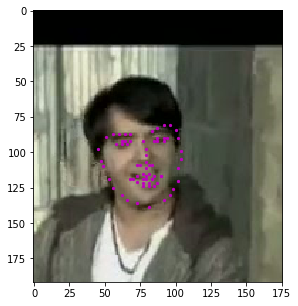

In [9]:
# Display a few different types of images by changing the index n

# select an image by index in our data frame
n = 0
image_name = key_pts_frame.iloc[n, 0]
key_pts = key_pts_frame.iloc[n, 1:].values
key_pts = key_pts.astype('float').reshape(-1, 2)

plt.figure(figsize=(5, 5))
show_keypoints(mpimg.imread(os.path.join('data/training/', image_name)), key_pts)
plt.show()